In [68]:
import pandas as pd 
from sklearn.cluster import KMeans, HDBSCAN
from sklearn.decomposition import PCA

In [69]:
trial_data = pd.read_pickle('processed_data/train_data/ArgentinaGermanyFinal77.pkl')

In [85]:
# Cherry picked for data visualization
no_sub_event_period = trial_data["Embeddings"][121]
sub_event_period = trial_data["Embeddings"][122]

In [86]:
no_sub_event_period.shape

(1776, 768)

In [87]:
sub_event_period.shape

(1679, 768)

In [94]:
kmeans_no_sub = KMeans(n_clusters=9, random_state=0).fit(no_sub_event_period)
hdbscan_no_sub = HDBSCAN(min_cluster_size=5, store_centers="both").fit(no_sub_event_period)

In [95]:
kmeans_sub = KMeans(n_clusters=9, random_state=0).fit(sub_event_period)
hdbscan_sub = HDBSCAN(min_cluster_size=5, store_centers="both").fit(sub_event_period)

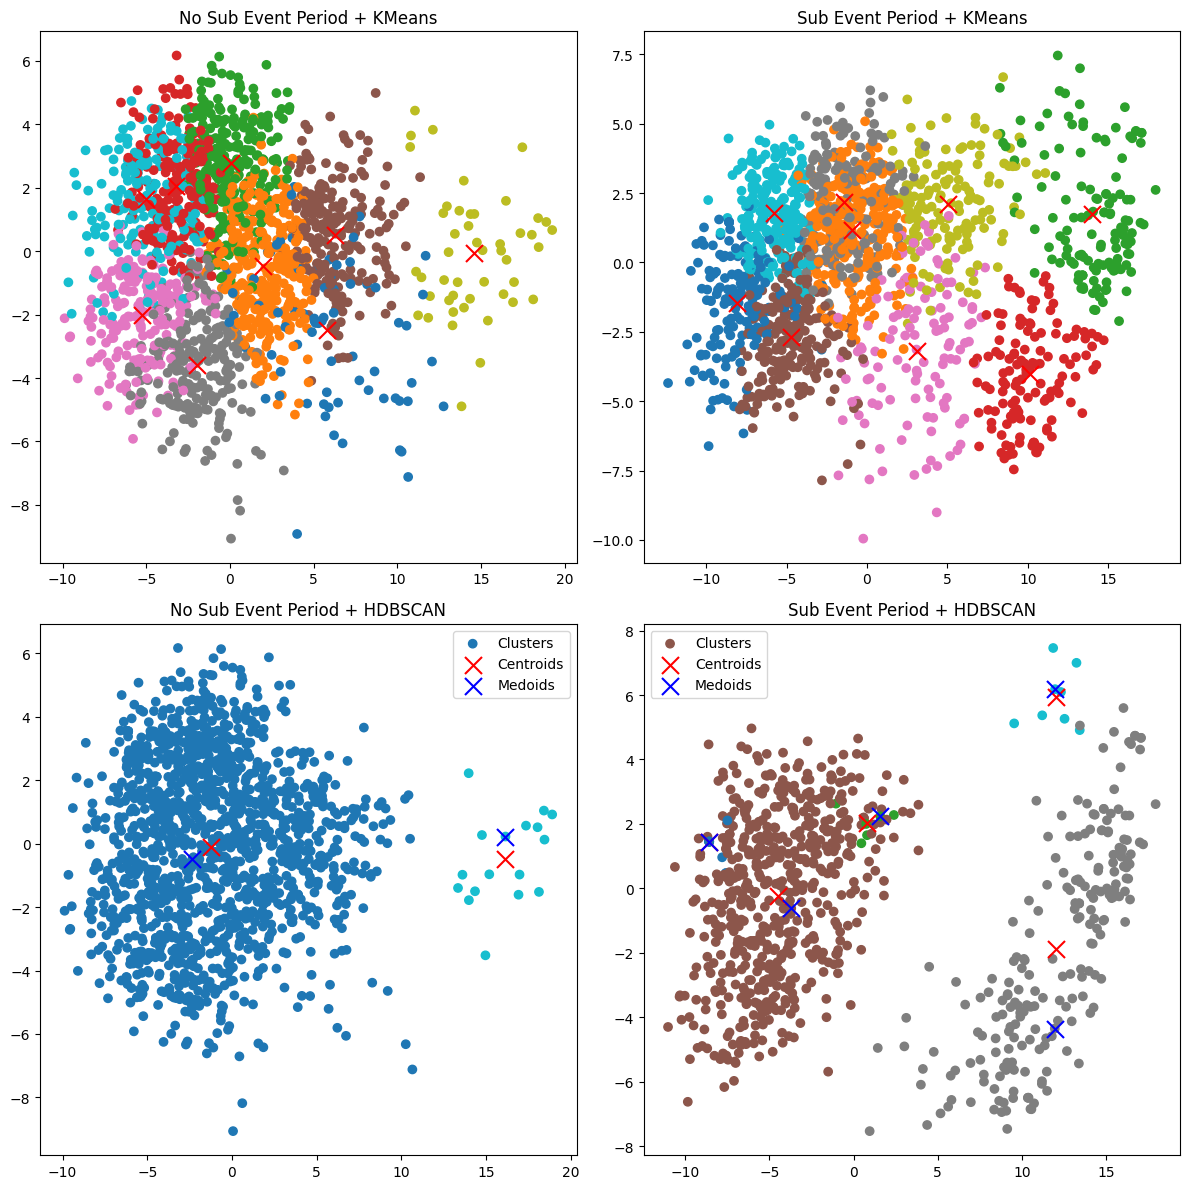

In [96]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA
tsne_no_sub = PCA(n_components=2)
tsne_sub = PCA(n_components=2)
no_sub_event_period_reduced = tsne_no_sub.fit_transform(no_sub_event_period)
sub_event_period_reduced = tsne_sub.fit_transform(sub_event_period)


# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Top left: no_sub + kmeans
axs[0, 0].scatter(no_sub_event_period_reduced[:, 0], no_sub_event_period_reduced[:, 1], c=kmeans_no_sub.labels_, cmap = "tab10")
centroids_no_sub = tsne_no_sub.transform(kmeans_no_sub.cluster_centers_)
axs[0, 0].scatter(centroids_no_sub[:, 0], centroids_no_sub[:, 1], c='red', marker='x', s = 150, label='Centroids')
axs[0, 0].set_title('No Sub Event Period + KMeans')

# Top right: sub + kmeans
axs[0, 1].scatter(sub_event_period_reduced[:, 0], sub_event_period_reduced[:, 1], c=kmeans_sub.labels_, cmap = "tab10")
centroids_sub = tsne_sub.transform(kmeans_sub.cluster_centers_)
axs[0, 1].scatter(centroids_sub[:, 0], centroids_sub[:, 1], c='red', marker='x', s = 150, label='Centroids')
axs[0, 1].set_title('Sub Event Period + KMeans')

# Bottom left: no_sub + hdbscan
labels_no_sub = hdbscan_no_sub.labels_
mask_no_sub = labels_no_sub == -1
axs[1, 0].scatter(no_sub_event_period_reduced[~mask_no_sub, 0], no_sub_event_period_reduced[~mask_no_sub, 1], c=labels_no_sub[~mask_no_sub], label='Clusters', cmap = "tab10")
#axs[1, 0].scatter(no_sub_event_period_reduced[mask_no_sub, 0], no_sub_event_period_reduced[mask_no_sub, 1], c='black', marker='x', label='Noise')
centroids_no_sub_hdbscan = tsne_no_sub.transform(hdbscan_no_sub.centroids_)
axs[1, 0].scatter(centroids_no_sub_hdbscan[:, 0], centroids_no_sub_hdbscan[:, 1], c='red', marker='x', s = 150, label='Centroids')
medoids_no_sub_hdbscan = tsne_no_sub.transform(hdbscan_no_sub.medoids_)
axs[1, 0].scatter(medoids_no_sub_hdbscan[:, 0], medoids_no_sub_hdbscan[:, 1], c='blue', marker='x', s = 150, label='Medoids')
axs[1, 0].set_title('No Sub Event Period + HDBSCAN')

# Bottom right: sub + hdbscan
labels_sub = hdbscan_sub.labels_
mask_sub = labels_sub == -1
axs[1, 1].scatter(sub_event_period_reduced[~mask_sub, 0], sub_event_period_reduced[~mask_sub, 1], c=labels_sub[~mask_sub], label='Clusters', cmap = "tab10")
#axs[1, 1].scatter(sub_event_period_reduced[mask_sub, 0], sub_event_period_reduced[mask_sub, 1], c='black', marker='x', label='Noise')
centroids_sub_hdbscan = tsne_sub.transform(hdbscan_sub.centroids_)
axs[1, 1].scatter(centroids_sub_hdbscan[:, 0], centroids_sub_hdbscan[:, 1], c='red', marker='x', s = 150, label='Centroids')
medoids_sub_hdbscan = tsne_sub.transform(hdbscan_sub.medoids_)
axs[1, 1].scatter(medoids_sub_hdbscan[:, 0], medoids_sub_hdbscan[:, 1], c='blue', marker='x', s = 150, label='Medoids')
axs[1, 1].set_title('Sub Event Period + HDBSCAN')

# Add legends
axs[1, 0].legend()
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [100]:
def cluster_embeddings_hdbscan(embeddings, min_cluster_size = 5):
    clusterer = HDBSCAN(min_cluster_size=min_cluster_size, store_centers="medoid").fit(embeddings)
    labels = clusterer.labels_
    medoids_count = np.bincount(labels[labels >= 0])
    return clusterer.medoids_, medoids_count

In [102]:
test, test_count = cluster_embeddings_hdbscan(no_sub_event_period)


In [103]:
tsne_no_sub.transform(test)

array([[-2.33615715, -0.48108521],
       [16.15065493,  0.2242701 ]])